In [92]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, GlobalAveragePooling1D
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor

gpus = tf.config.list_physical_devices('GPU')
#tf.config.experimental.set_virtual_device_configuration(gpus[0], [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=2048)])

In [2]:
#Reading input data for training and testing

# Getting current working directory and storing it as a string variable and reading all empty seat readings into one dataframe

directory_in_str = "E:\\Haritha\\MasterThesis\\ModelTraining\\aa_measurements\\FFTfilegenerationpurpose\\PSDfromwindowedADC_train"
Emptyfilelist = []
empty = pd.DataFrame()
print("Adding the following files : ")
for file in os.listdir(directory_in_str) :
    if file.startswith("PSD") :
        print(file)
        filepathempty = directory_in_str +"\\" + file
        df1 = pd.read_csv(filepathempty, engine = 'python')
        empty  = empty.append(df1)
    else :
        continue  
        
# Empty seat Data ingest and attach Label = 0
#empty.reset_index(inplace = True)

#Index given is 16, as iloc uses n-1 as the end limit for 0:16 
#empty.drop(empty.iloc[:,0:16] ,axis=1,inplace=True)
#empty["Label"] = 0
#empty = empty.T
empty.head()

Adding the following files : 
PSDfromWindowedADC-Part1.2.csv


C:\Users\Vinoth\AppData\Local\Temp\ipykernel_11420\3422600022.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  empty  = empty.append(df1)


PSDfromWindowedADC-Part1.csv


C:\Users\Vinoth\AppData\Local\Temp\ipykernel_11420\3422600022.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  empty  = empty.append(df1)


PSDfromWindowedADC-Part2.csv


C:\Users\Vinoth\AppData\Local\Temp\ipykernel_11420\3422600022.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  empty  = empty.append(df1)


PSDfromWindowedADC-Part3.2.csv


C:\Users\Vinoth\AppData\Local\Temp\ipykernel_11420\3422600022.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  empty  = empty.append(df1)


PSDfromWindowedADC-Part3.csv


C:\Users\Vinoth\AppData\Local\Temp\ipykernel_11420\3422600022.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  empty  = empty.append(df1)


PSDfromWindowedADC-Part4.csv


C:\Users\Vinoth\AppData\Local\Temp\ipykernel_11420\3422600022.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  empty  = empty.append(df1)


PSDfromWindowedADC-Part5.csv


C:\Users\Vinoth\AppData\Local\Temp\ipykernel_11420\3422600022.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  empty  = empty.append(df1)


PSDfromWindowedADC-Part7.csv


C:\Users\Vinoth\AppData\Local\Temp\ipykernel_11420\3422600022.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  empty  = empty.append(df1)


,600,601,602,603,604,605,606,607,608,609,...,991,992,993,994,995,996,997,998,999,Label
0,2.748809e-08,3.332693e-08,9.872153e-08,2.446051e-08,3.622424e-08,4.787945e-08,2.030569e-08,1.773970e-07,3.183885e-07,5.978933e-08,...,1.401158e-07,1.768016e-07,5.216571e-09,1.674608e-07,1.324227e-07,2.149789e-08,2.200678e-07,1.181448e-07,8.430500e-08,0
1,2.179222e-07,1.470685e-07,7.017063e-09,1.954773e-07,1.484832e-07,3.796582e-09,6.570627e-08,5.991503e-08,1.039401e-07,1.328192e-08,...,6.009002e-08,1.666609e-07,2.695219e-08,1.583298e-07,3.840661e-07,1.269835e-07,3.042477e-08,2.304195e-07,1.312641e-07,0
2,1.856630e-06,2.276621e-06,1.486936e-06,1.095980e-06,1.684702e-06,1.735739e-06,9.984139e-07,1.248355e-06,1.962751e-06,1.636910e-06,...,9.038868e-09,2.974540e-07,2.810878e-07,1.816261e-08,2.675802e-07,6.177093e-07,4.187593e-07,8.489836e-08,3.876339e-07,0
3,1.267594e-06,1.081372e-06,1.857954e-06,2.440263e-06,1.846883e-06,1.486875e-06,2.074748e-06,2.093518e-06,1.332757e-06,1.107164e-06,...,3.223139e-08,1.856079e-07,2.853883e-07,4.117087e-08,1.764363e-07,5.902691e-07,4.215293e-07,7.919791e-08,2.496895e-07,0
4,9.804397e-08,9.861598e-08,5.444161e-09,5.262808e-08,5.027296e-08,8.912618e-08,2.867742e-08,1.621342e-08,1.182255e-07,4.140290e-08,...,7.703347e-08,1.220853e-07,9.505220e-08,1.816471e-07,1.125177e-07,5.207056e-08,5.482889e-08,5.011694e-08,9.305340e-08,0


In [3]:
empty.reset_index(drop=True, inplace = True)
empty

,600,601,602,603,604,605,606,607,608,609,...,991,992,993,994,995,996,997,998,999,Label
0,2.748809e-08,3.332693e-08,9.872153e-08,2.446051e-08,3.622424e-08,4.787945e-08,2.030569e-08,1.773970e-07,3.183885e-07,5.978933e-08,...,1.401158e-07,1.768016e-07,5.216571e-09,1.674608e-07,1.324227e-07,2.149789e-08,2.200678e-07,1.181448e-07,8.430500e-08,0
1,2.179222e-07,1.470685e-07,7.017063e-09,1.954773e-07,1.484832e-07,3.796582e-09,6.570627e-08,5.991503e-08,1.039401e-07,1.328192e-08,...,6.009002e-08,1.666609e-07,2.695219e-08,1.583298e-07,3.840661e-07,1.269835e-07,3.042477e-08,2.304195e-07,1.312641e-07,0
2,1.856630e-06,2.276621e-06,1.486936e-06,1.095980e-06,1.684702e-06,1.735739e-06,9.984139e-07,1.248355e-06,1.962751e-06,1.636910e-06,...,9.038868e-09,2.974540e-07,2.810878e-07,1.816261e-08,2.675802e-07,6.177093e-07,4.187593e-07,8.489836e-08,3.876339e-07,0
3,1.267594e-06,1.081372e-06,1.857954e-06,2.440263e-06,1.846883e-06,1.486875e-06,2.074748e-06,2.093518e-06,1.332757e-06,1.107164e-06,...,3.223139e-08,1.856079e-07,2.853883e-07,4.117087e-08,1.764363e-07,5.902691e-07,4.215293e-07,7.919791e-08,2.496895e-07,0
4,9.804397e-08,9.861598e-08,5.444161e-09,5.262808e-08,5.027296e-08,8.912618e-08,2.867742e-08,1.621342e-08,1.182255e-07,4.140290e-08,...,7.703347e-08,1.220853e-07,9.505220e-08,1.816471e-07,1.125177e-07,5.207056e-08,5.482889e-08,5.011694e-08,9.305340e-08,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16675,2.712420e-05,3.016087e-05,2.393458e-05,2.793748e-05,3.326539e-05,2.567574e-05,2.499619e-05,3.376650e-05,3.389206e-05,3.604290e-05,...,1.657950e-06,1.102177e-06,1.572297e-06,2.534570e-06,1.153704e-06,1.180562e-06,2.066178e-06,1.321642e-06,2.235474e-06,1
16676,2.793921e-06,2.939580e-06,5.640468e-07,1.446058e-06,4.358642e-06,2.045455e-06,6.188658e-07,4.657902e-06,2.642781e-06,5.011732e-09,...,4.217484e-07,8.751693e-07,4.111583e-07,3.709322e-08,9.360414e-08,3.511419e-07,3.839675e-07,1.634197e-07,1.134261e-07,1
16677,5.645044e-08,4.639446e-08,2.103616e-07,8.137073e-07,5.055350e-07,2.333802e-08,1.728920e-07,1.635194e-08,3.203605e-07,2.068692e-07,...,3.020550e-08,1.169020e-07,2.384128e-07,1.902126e-07,2.727860e-08,1.885947e-07,4.543908e-07,1.613592e-07,1.193475e-08,1
16678,1.662935e-06,2.793241e-07,1.118369e-06,1.682903e-06,1.074126e-07,7.768462e-07,5.896074e-07,2.375495e-07,1.691769e-06,8.511187e-07,...,4.901364e-07,1.476272e-07,1.556306e-07,2.944035e-07,5.226535e-08,9.316871e-08,1.634945e-09,1.628679e-07,1.816162e-07,1


In [57]:
empty.iloc[5000,400]

0

In [4]:
Fs = 1953125
N = 32768
f2 = np.linspace(600 * Fs/(N), 800* Fs/(N), 200)

Text(0.5, 0, 'Frequency (Hz)')

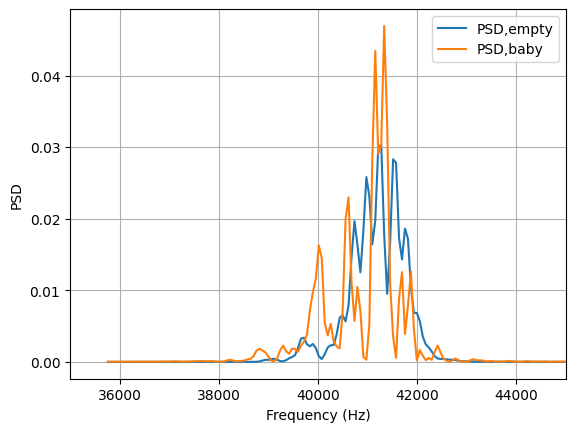

In [26]:
plt.plot(f2, empty.iloc[0:100,0:200], label='PSD,empty')
plt.plot(f2, empty.iloc[16675,0:200], label='PSD,baby')
plt.legend()
plt.xlim([35000,45000])
plt.grid(True)
plt.ylabel("PSD") 
plt.xlabel("Frequency (Hz)")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 0, 'Frequency (Hz)')

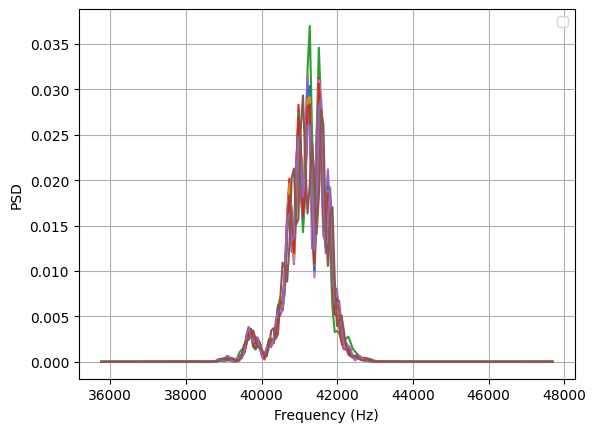

In [54]:
#Plotting empty seats from same measurement batch
for i in range(16) :
    plt.plot(f2,empty.iloc[i,0:200])
#plt.plot(f2, empty.iloc[16675,0:200], label='PSD,baby')
plt.legend()
#plt.xlim([35000,45000])
plt.grid(True)
plt.ylabel("PSD") 
plt.xlabel("Frequency (Hz)")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 0, 'Frequency (Hz)')

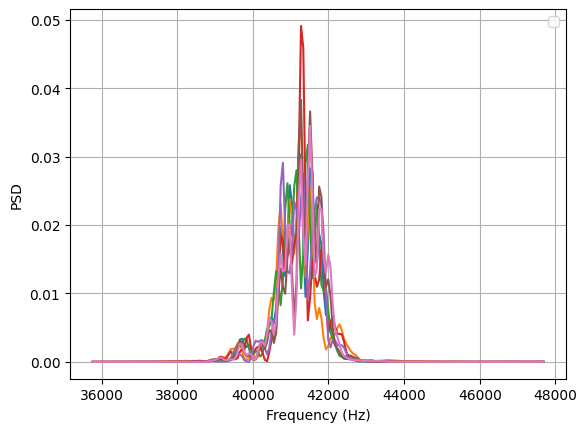

In [50]:
#Plotting empty seats from different measurement batches
plt.plot(f2,empty.iloc[0,0:200])
plt.plot(f2,empty.iloc[100,0:200])
plt.plot(f2,empty.iloc[200,0:200])
plt.plot(f2,empty.iloc[5000,0:200])
plt.plot(f2,empty.iloc[5200,0:200])
plt.plot(f2,empty.iloc[5400,0:200])
plt.plot(f2,empty.iloc[5600,0:200])
#plt.plot(f2, empty.iloc[16675,0:200], label='PSD,baby')
plt.legend()
#plt.xlim([35000,45000])
plt.grid(True)
plt.ylabel("PSD") 
plt.xlabel("Frequency (Hz)")

In [31]:
train, test = train_test_split(empty, test_size=0.2, random_state=42, shuffle=True)

In [32]:
X_train = train.iloc[:,0:200]
#X_train = X_train/1000
y_train = train['Label']
X_test = test.iloc[:,0:200]
#X_test = X_test/1000
y_test = test['Label']

In [49]:
len(y_test)

3336

In [50]:
sum(y_test)

1720

In [33]:
X_train.shape

(13344, 200)

In [34]:
X_train_np = X_train.to_numpy()
X_train_np = np.reshape(X_train_np,(X_train.shape[0],X_train.shape[1],1))
X_train_np.shape

(13344, 200, 1)

In [35]:
X_test_np = X_test.to_numpy()
X_test_np = np.reshape(X_test_np,(X_test.shape[0],X_test.shape[1],1))
X_test_np.shape

(3336, 200, 1)

In [58]:
# It can be used to reconstruct the model identically.
import keras
reconstructed_model = keras.models.load_model("MLP_21.07.2023.keras")

In [36]:
input_dim = len(X_train.columns)
input_dim

200

In [40]:
neurons = 64
epochs = 150
batch_size = 50

In [38]:
#Run this step to refresh the layers added to the model. You can rebuild the layers in the model from the beginning.
model = Sequential()

In [39]:
model.add(Dense(neurons, input_dim = input_dim, activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                12864     
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 12,929
Trainable params: 12,929
Non-trainable params: 0
_________________________________________________________________


In [41]:
history = model.fit(X_train_np,y_train, epochs=epochs, batch_size=batch_size, verbose=1, validation_split=0.2)
predictions= model.predict(X_test_np)

Epoch 1/150
214/214 [==============================] - 4s 4ms/step - loss: 0.6826 - accuracy: 0.5418 - val_loss: 0.6693 - val_accuracy: 0.6178
Epoch 2/150
214/214 [==============================] - 1s 3ms/step - loss: 0.6437 - accuracy: 0.6675 - val_loss: 0.6220 - val_accuracy: 0.6905
Epoch 3/150
214/214 [==============================] - 1s 3ms/step - loss: 0.5953 - accuracy: 0.7005 - val_loss: 0.5800 - val_accuracy: 0.7006
Epoch 4/150
214/214 [==============================] - 1s 3ms/step - loss: 0.5569 - accuracy: 0.7258 - val_loss: 0.5477 - val_accuracy: 0.7152
Epoch 5/150
214/214 [==============================] - 1s 3ms/step - loss: 0.5276 - accuracy: 0.7467 - val_loss: 0.5241 - val_accuracy: 0.7445
Epoch 6/150
214/214 [==============================] - 1s 3ms/step - loss: 0.5055 - accuracy: 0.7646 - val_loss: 0.5065 - val_accuracy: 0.7632
Epoch 7/150
214/214 [==============================] - 1s 3ms/step - loss: 0.4881 - accuracy: 0.7770 - val_loss: 0.4919 - val_accuracy: 0.7666

Epoch 58/150
214/214 [==============================] - 1s 3ms/step - loss: 0.2175 - accuracy: 0.9310 - val_loss: 0.2347 - val_accuracy: 0.9194
Epoch 59/150
214/214 [==============================] - 1s 3ms/step - loss: 0.2146 - accuracy: 0.9326 - val_loss: 0.2281 - val_accuracy: 0.9213
Epoch 60/150
214/214 [==============================] - 1s 3ms/step - loss: 0.2117 - accuracy: 0.9333 - val_loss: 0.2255 - val_accuracy: 0.9232
Epoch 61/150
214/214 [==============================] - 1s 3ms/step - loss: 0.2096 - accuracy: 0.9348 - val_loss: 0.2278 - val_accuracy: 0.9202
Epoch 62/150
214/214 [==============================] - 1s 3ms/step - loss: 0.2077 - accuracy: 0.9328 - val_loss: 0.2213 - val_accuracy: 0.9269
Epoch 63/150
214/214 [==============================] - 1s 3ms/step - loss: 0.2050 - accuracy: 0.9354 - val_loss: 0.2184 - val_accuracy: 0.9284
Epoch 64/150
214/214 [==============================] - 1s 3ms/step - loss: 0.2022 - accuracy: 0.9358 - val_loss: 0.2186 - val_accuracy:

Epoch 115/150
214/214 [==============================] - 1s 3ms/step - loss: 0.1250 - accuracy: 0.9588 - val_loss: 0.1446 - val_accuracy: 0.9494
Epoch 116/150
214/214 [==============================] - 1s 3ms/step - loss: 0.1249 - accuracy: 0.9589 - val_loss: 0.1450 - val_accuracy: 0.9487
Epoch 117/150
214/214 [==============================] - 1s 3ms/step - loss: 0.1229 - accuracy: 0.9595 - val_loss: 0.1455 - val_accuracy: 0.9490
Epoch 118/150
214/214 [==============================] - 1s 3ms/step - loss: 0.1226 - accuracy: 0.9592 - val_loss: 0.1431 - val_accuracy: 0.9505
Epoch 119/150
214/214 [==============================] - 1s 3ms/step - loss: 0.1214 - accuracy: 0.9601 - val_loss: 0.1425 - val_accuracy: 0.9513
Epoch 120/150
214/214 [==============================] - 1s 3ms/step - loss: 0.1213 - accuracy: 0.9593 - val_loss: 0.1407 - val_accuracy: 0.9498
Epoch 121/150
214/214 [==============================] - 1s 3ms/step - loss: 0.1201 - accuracy: 0.9608 - val_loss: 0.1423 - val_ac

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


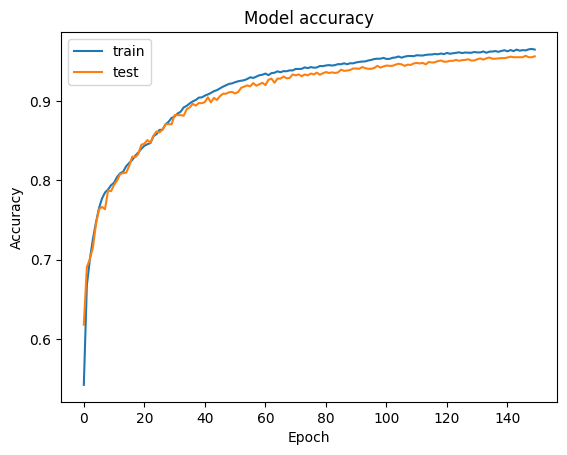

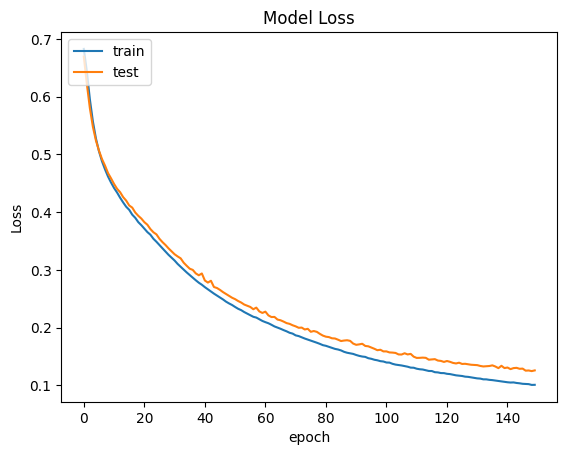

In [43]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [45]:
y_pred = (predictions > 0.5) *1

In [45]:
output = pd.DataFrame({'ID' : test.index, 'PreferredScore':predictions.flatten()})
output.to_csv('preferred15032023.csv', index=False)

In [74]:
scores = model.evaluate(X_test_np,y_test, verbose=1)
print(scores)

105/105 [==============================] - 0s 2ms/step - loss: 0.2457 - accuracy: 0.9191
[0.24569454789161682, 0.9190647602081299]


In [54]:
scores2 = reconstructed_model.evaluate(X_test_np,y_test, verbose=1)
print(scores2)

105/105 [==============================] - 0s 2ms/step - loss: 0.1187 - accuracy: 0.9550
[0.11867550015449524, 0.9550359845161438]


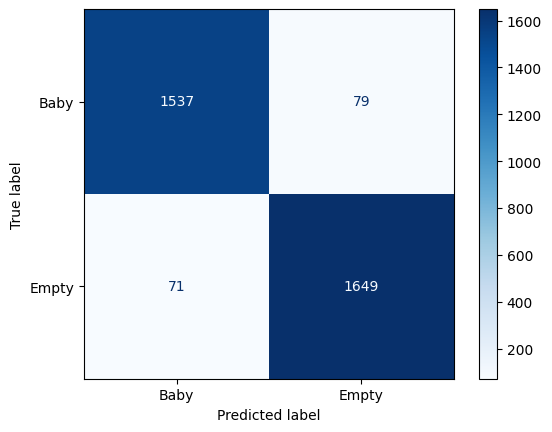

In [48]:
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Empty", "Baby"])

disp.plot(cmap=plt.cm.Blues)
plt.show()

In [ ]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, y_pred)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_pred)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_pred)
print('F1 score: %f' % f1)

In [51]:
#Saving the model
model.save("MLP_21.07.2023.keras")

In [105]:
#Testing on measurements from another day - 13.04.2023

directory_in_str_new = "E:\\Haritha\\MasterThesis\\ModelTraining\\aa_measurements\\FFTfilegenerationpurpose\\PSDfromwindowedADC_test"
Emptyfilelistnew = []
emptynew = pd.DataFrame()
print("Adding the following files : ")
for file in os.listdir(directory_in_str_new) :
    if file.startswith("PSDfromWindowedADC-Part8") :
        print(file)
        filepathemptynew = directory_in_str_new +"\\" + file
        df1new = pd.read_csv(filepathemptynew, engine = 'python')
        emptynew  = emptynew.append(df1new)
    else :
        continue  
        
#emptynew.head()



Adding the following files : 
PSDfromWindowedADC-Part8.csv


C:\Users\Vinoth\AppData\Local\Temp\ipykernel_11420\188331491.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  emptynew  = emptynew.append(df1new)


In [106]:
test_new, test_leftout = train_test_split(emptynew, test_size=0.001, random_state=42, shuffle=True)

X_testnew = test_new.iloc[:,0:200]
y_testnew = test_new['Label']

In [107]:
X_testnew = X_testnew.to_numpy()
X_testnew = np.reshape(X_testnew,(X_testnew.shape[0],X_testnew.shape[1],1))
X_testnew.shape

(599, 200, 1)

In [108]:
type(X_testnew)

numpy.ndarray

In [109]:
predictions2 = reconstructed_model.predict(X_testnew)
y_pred2 = (predictions2 > 0.5) *1
scores2 = reconstructed_model.evaluate(X_testnew,y_testnew, verbose=1)
print(scores2)

19/19 [==============================] - 0s 6ms/step - loss: 1.1928 - accuracy: 0.5626
[1.192770004272461, 0.5626043677330017]


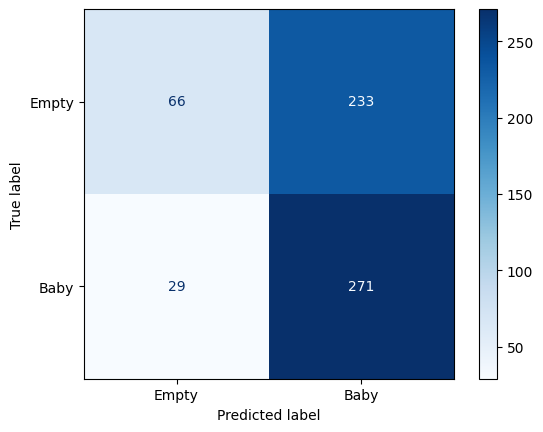

In [110]:
cm_unseendata = confusion_matrix(y_testnew, y_pred2)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_unseendata, display_labels=["Empty", "Baby"])

disp.plot(cmap=plt.cm.Blues)
plt.show()

In [111]:
TN, FP, FN, TP = cm_unseendata.ravel()
# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
print('TPR: %f' % TPR)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
print('TNR: %f' % TNR)
# Fall out or false positive rate
FPR = FP/(FP+TN)
print('FPR: %f' % FPR)
# False negative rate
FNR = FN/(TP+FN)
print('FNR: %f' % FNR)

TPR: 0.903333
TNR: 0.220736
FPR: 0.779264
FNR: 0.096667


In [112]:

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_testnew, y_pred2)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_testnew, y_pred2)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_testnew, y_pred2)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_testnew, y_pred2)
print('F1 score: %f' % f1)

Accuracy: 0.562604
Precision: 0.537698
Recall: 0.903333
F1 score: 0.674129


In [54]:
partpppar

### Extra Tried Models

In [ ]:
model.add(Dense(neurons, input_dim = input_dim, activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [25]:
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1],1)))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(1, activation='softmax'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary

<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x000002157877E410>>

In [40]:
model.add(Conv1D(64,2, activation="relu", input_shape=(X_train.shape[1],1)))
model.add(Dense(16, activation='relu'))
model.add(MaxPooling1D())
model.add(Flatten())
#model.add(Dense(3, activation = 'softmax'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_20 (Conv1D)          (None, 199, 64)           192       
                                                                 
 dense_6 (Dense)             (None, 199, 16)           1040      
                                                                 
 max_pooling1d_5 (MaxPooling  (None, 99, 16)           0         
 1D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 1584)              0         
                                                                 
 dense_7 (Dense)             (None, 1)                 1585      
                                                                 
Total params: 2,817
Trainable params: 2,817
Non-trainable params: 0
____________________________________________________

# Feature Importance

#### Calculating importances of features in relation to the Target Class (0-empty, 1-baby)

In [23]:
X_train

,34928,35048,35167,35286,35405,35524,35644,35763,35882,36001,...,43869,43988,44107,44227,44346,44465,44584,44703,44823,44942
6805,0.004,0.002,0.001,0.001,0.001,0.003,0.004,0.005,0.007,0.007,...,0.032,0.036,0.029,0.026,0.024,0.022,0.020,0.018,0.015,0.013
9591,0.006,0.005,0.004,0.004,0.002,0.001,0.001,0.003,0.003,0.005,...,0.032,0.033,0.028,0.025,0.026,0.023,0.021,0.019,0.018,0.015
10244,0.001,0.001,0.000,0.001,0.002,0.004,0.005,0.005,0.007,0.008,...,0.032,0.032,0.029,0.024,0.025,0.022,0.021,0.020,0.017,0.015
102,0.012,0.012,0.011,0.012,0.011,0.011,0.009,0.010,0.006,0.005,...,0.023,0.027,0.019,0.023,0.020,0.022,0.019,0.019,0.019,0.019
3988,0.007,0.006,0.006,0.004,0.003,0.002,0.002,0.003,0.005,0.006,...,0.031,0.039,0.032,0.029,0.028,0.026,0.022,0.022,0.018,0.016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16850,0.007,0.007,0.007,0.007,0.006,0.005,0.003,0.005,0.003,0.005,...,0.026,0.021,0.020,0.012,0.013,0.008,0.008,0.006,0.014,0.012
6265,0.004,0.004,0.003,0.002,0.001,0.001,0.003,0.004,0.006,0.007,...,0.032,0.036,0.028,0.029,0.026,0.025,0.023,0.022,0.019,0.017
11284,0.006,0.007,0.008,0.011,0.011,0.012,0.014,0.014,0.016,0.017,...,0.027,0.029,0.024,0.019,0.020,0.014,0.015,0.008,0.012,0.007
860,0.008,0.008,0.007,0.007,0.006,0.006,0.003,0.004,0.004,0.005,...,0.033,0.032,0.017,0.015,0.012,0.005,0.004,0.005,0.012,0.015


In [24]:
y_train

6805     1
9591     1
10244    1
102      1
3988     1
        ..
16850    0
6265     0
11284    0
860      0
15795    0
Name: Label, Length: 27189, dtype: int64

<AxesSubplot: >

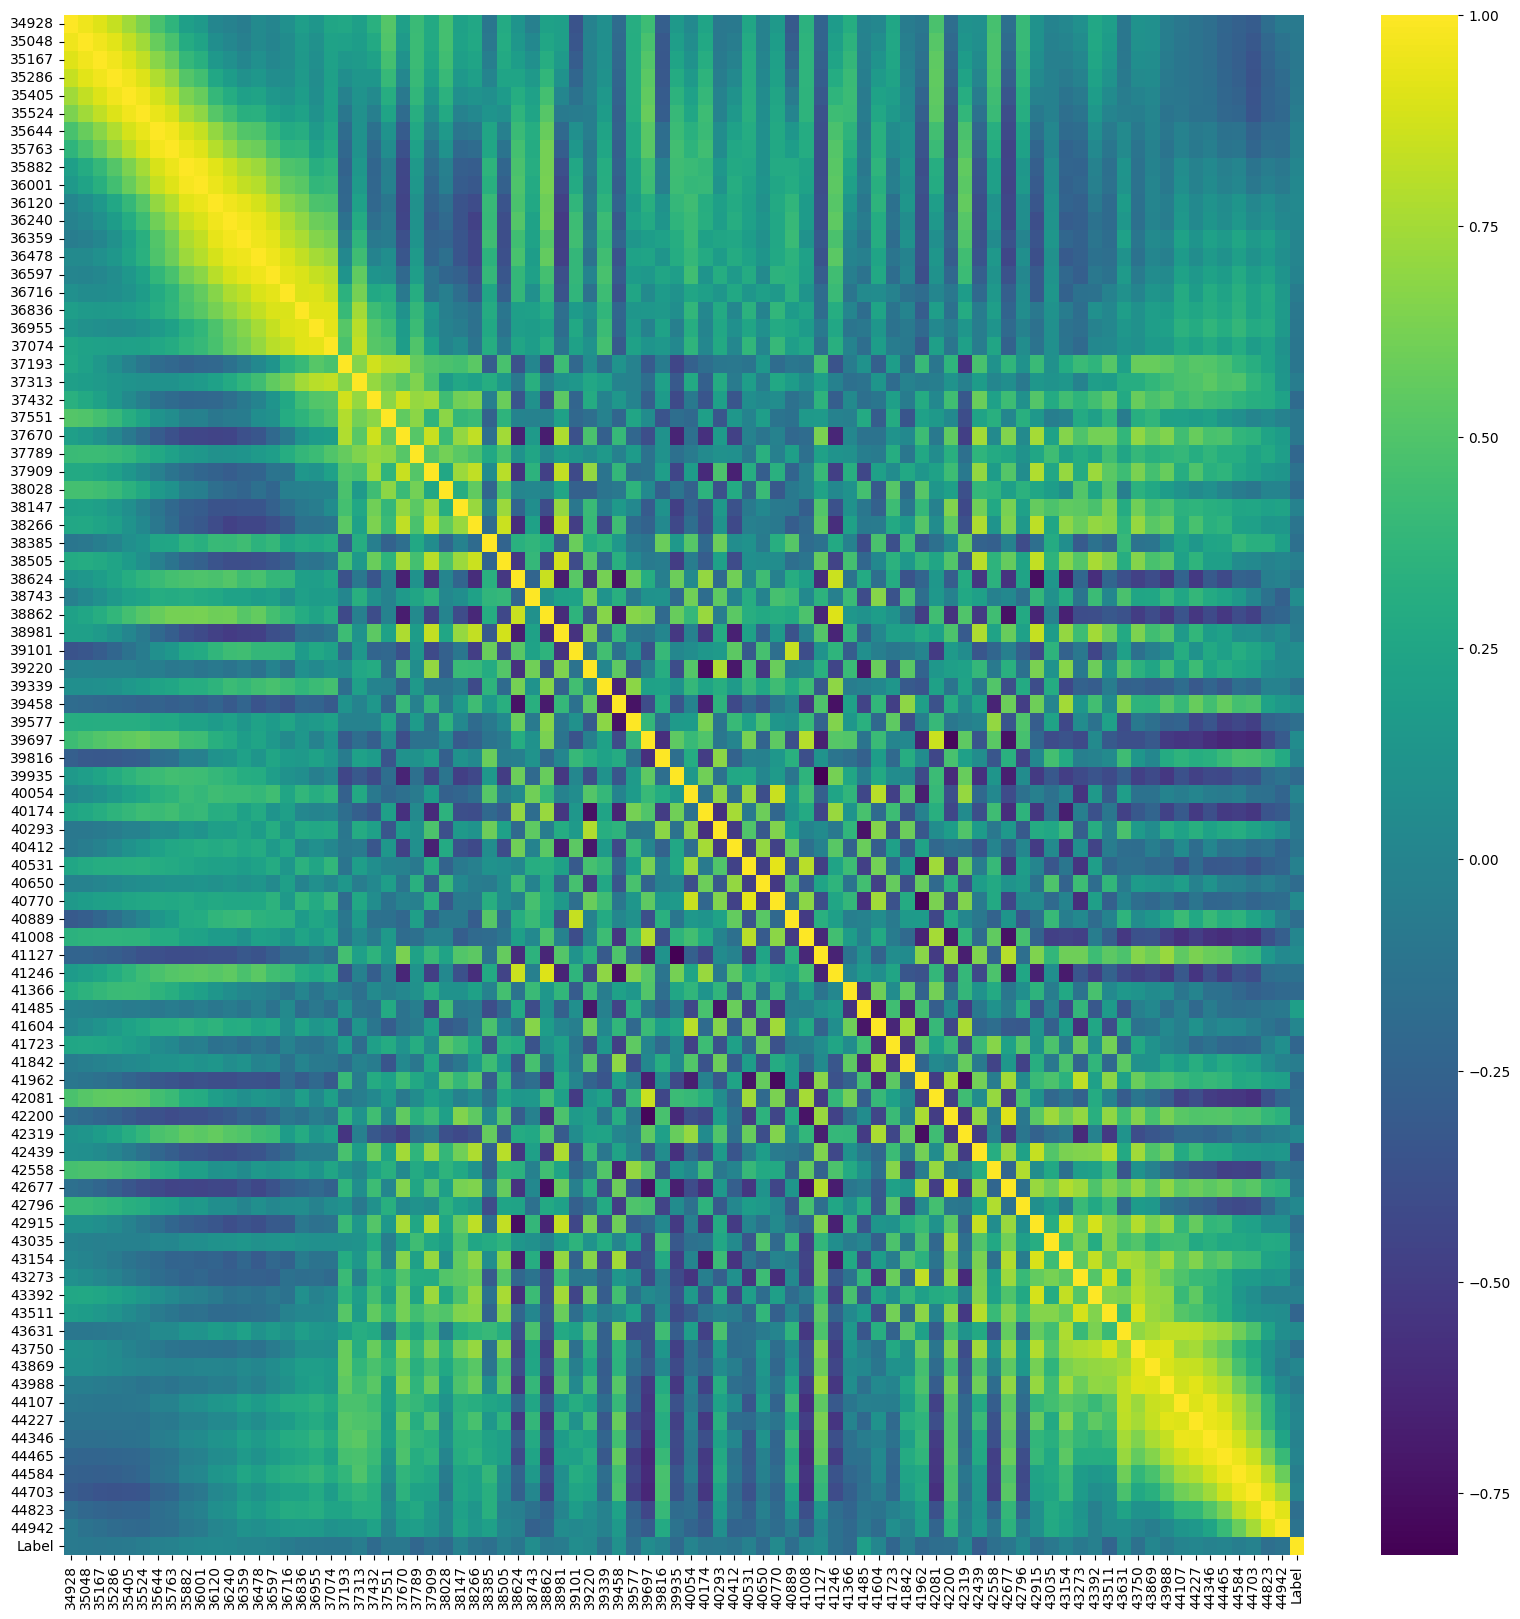

In [74]:
plt.figure(figsize=(20,20))
sns.heatmap(total.corr(),cmap='viridis',annot=False)

In [46]:
#Testing out feature importances with ExtraTrees Regressor Model

regmod = ExtraTreesRegressor()
regmod.fit(X_train.iloc[:,30:130],y_train)

#print(regmod.feature_importances_)

ExtraTreesRegressor()

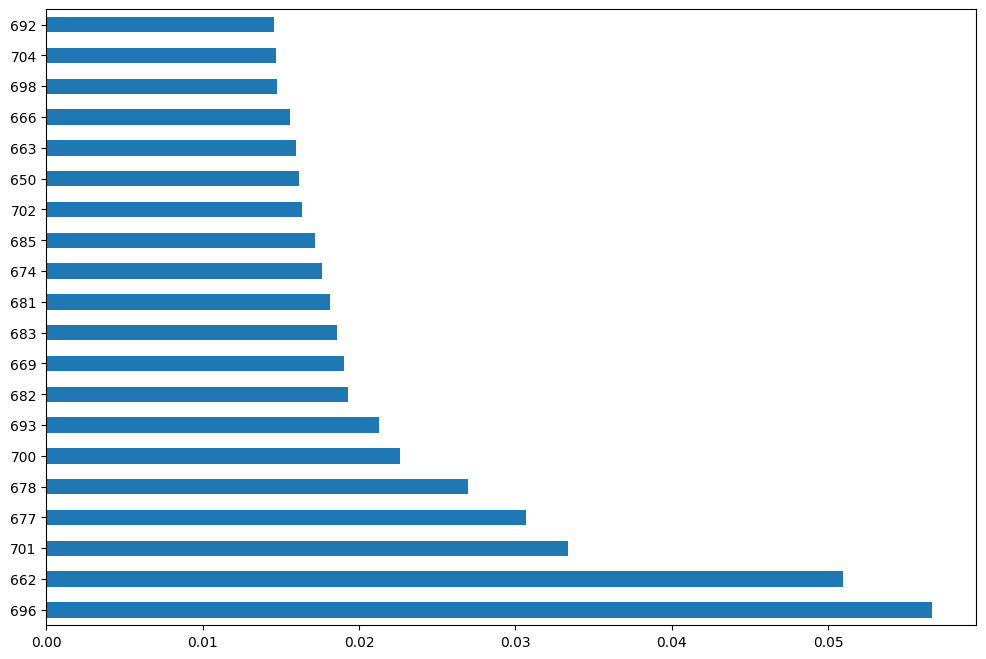

In [47]:
plt.figure(figsize = (12,8))
feat_importances = pd.Series(regmod.feature_importances_, index=X_train.iloc[:,30:130].columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [ ]:
Neurons = 64, batch size = 128, validation accuracy = 0.8990, loss = 0.2965
Neurons = 64, batch size = 64 , validation accuracy = 0.9347 , loss = 0.2118
Neurons = 64 , batch size = 32 , validation accuracy = 0.9423 , loss = 0.1899
Neurons = 64 , batch size = 16 , validation accuracy = 0.9563 , loss = 0.1366
Neurons = 64 , batch size = 1, validation accuracy = 0.9730 , loss = 0.0917


Text(0.5, 0, 'Batch size')

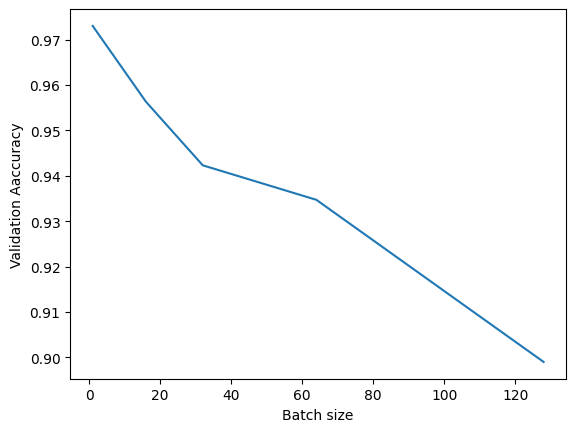

In [115]:
x= [128,64,32,16,1]
y=   [0.8990, 0.9347 ,0.9423 , 0.9563 , 0.9730]
z=  [0.2965, 0.2118, 0.1899, 0.1366, 0.0917 ]
plt.plot(x,y)
plt.ylabel('Validation Aaccuracy')
plt.xlabel('Batch size')

Text(0.5, 0, 'Batch size')

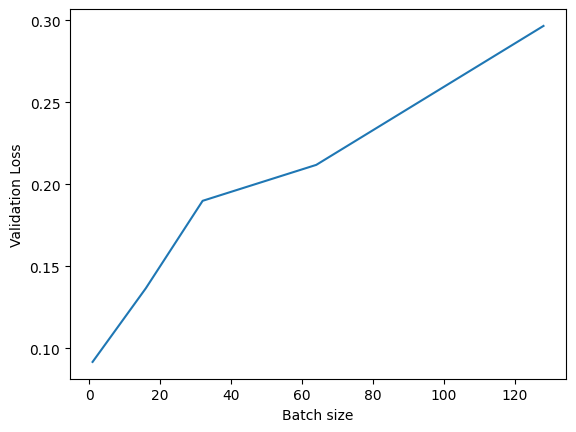

In [116]:
plt.plot(x,z)
plt.ylabel('Validation Loss')
plt.xlabel('Batch size')